# Question 1-(1): Insertion Sort Implementation

In [19]:
def insertionSort(A):
    for j in range(1, len(A)):
        key = A[j]
        #insert into sorted sequence:
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i = i - 1
        A[i+1] = key

A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
insertionSort(A)
print(A)

[-1, 0, 3, 10, 12, 16, 23, 23, 32, 56]


# Question 1-(2): Measuring Insertion Sort's Running Time

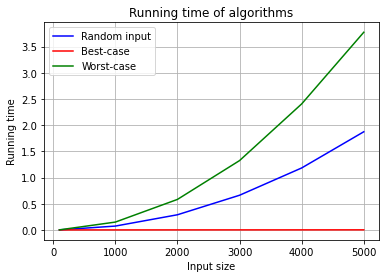

In [20]:
import numpy as np
# Import timer lib. to measure running time
from timeit import default_timer as timer
# Import plot lib. to plot results
import matplotlib.pyplot as plt


# Generate inputs, e.g., when n=100, n=1000, n=2000, ..., n=5000
size = [100, 1000, 2000, 3000, 4000, 5000]

# Generate different types of inputs
# - random_set: randomly generated integer in the range from 0 to 1000000
# - best_set: generate integer in ascending order (sorted)
# - worst_set: generate integer in descending order
random_set, best_set, worst_set = [], [], []
for i in range(0, len(size)):
    random_set.append(np.random.randint(0, 1000000, size[i]))
    best_set.append(np.arange(0, size[i]))
    worst_set.append(np.arange(size[i], 0, -1))
    

# We measure running time of algorithm for individual input sets
elapsed_time_random, elapsed_time_best, elapsed_time_worst = [], [], []
for i in range(0, len(random_set)):
    start = timer()
    insertionSort(random_set[i])
    end = timer()
    elapsed_time_random.append(end-start)
    
    start = timer()
    insertionSort(best_set[i])
    end = timer()
    elapsed_time_best.append(end-start)
    
    start = timer()
    insertionSort(worst_set[i])
    end = timer()
    elapsed_time_worst.append(end-start)
    
# plot the running time results
plt.plot(size, elapsed_time_random, color='blue', label='Random input')
plt.plot(size, elapsed_time_best, color='red', label='Best-case')
plt.plot(size, elapsed_time_worst, color='green', label='Worst-case')
plt.title("Running time of algorithms")
plt.xlabel("Input size")
plt.ylabel("Running time")
plt.grid(True)
plt.legend()
plt.show()

# Question 1-(3): Insertion Sort Running Time Trends Based on Inputs

### Best Case Input (Sorted Array): 
With the input as an already-sorted array, the running time of insertion sort is: 
$\Theta(n)$, $\Omega(n)$, and $O(n)$

### Worst Case Input (Reverse-Sorted Array):
With the input array in reverse-sorted order, the running time of insertion sort is:
$\Theta(n^2)$, $\Omega(n^2)$, and $O(n^2)$

### Random Input (Randomly-Populated Array):
With a random input array, the running time is around half of the worst-case, but that simplifies to:
$\Theta(n^2)$, $\Omega(n^2)$, and $O(n^2)$

# Question 2-(1): Merge Sort Implementation

In [29]:
def merge(A, p, q, r):
    # calculate length of left and right subarray respectively
    n1 = q - p + 1
    n2 = r - q
    
    # initialize left and right subarrays
    L = [0] * n1
    R = [0] * n2
    
    # copy original elements in A to L and R
    for i in range(n1):
        L[i] = A[p + i]
    for j in range (n2):
        R[j] = A[q + 1 + j]
        
    i = 0  # starting index of L subarray
    j = 0  # starting index of R subarray
    k = p  # starting index of merged subarray
    
    # merge left and right subarrays with simple comparisons 
    while i < n1 and j < n2:
        if L[i] < R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
        k += 1
    
    # if any values are left in L, copy them to A
    while i < n1: 
        A[k] = L[i]
        i += 1
        k += 1
    
    # if any values are left in R, copy them to A
    while j < n2:
        A[k] = R[j]
        j += 1
        k += 1
    
    
def mergeSort(A, p, r):
    if p < r:
        q = (p + r) // 2
    
        mergeSort(A, p, q)
        mergeSort(A, q+1, r)
        merge(A, p, q, r)
        
# testing with input from Q1-(1)
A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
mergeSort(A, 0, 9)
print(A)

[-1, 0, 3, 10, 12, 16, 23, 23, 32, 56]


# Question 2-(2): Measuring Merge Sort's vs. Insertion Sort's Running Time 

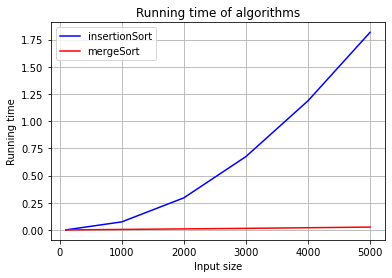

In [51]:
import numpy as np
# Import timer lib. to measure running time
from timeit import default_timer as timer
# Import plot lib. to plot results
import matplotlib.pyplot as plt


# Generate inputs, e.g., when n=100, n=1000, n=2000, ..., n=5000
size = [100, 1000, 2000, 3000, 4000, 5000]

# Generate different types of inputs
# - random_insertion_sort: randomly generated integer in the range from 0 to 1000000 for insertion sort use
# - random_merge_sort:     randomly generated integer in the range from 0 to 1000000 for merge sort use
random_insertion_sort, random_merge_sort = [], []
for i in range(0, len(size)):
    random_insertion_sort.append(np.random.randint(0, 1000000, size[i]))
    random_merge_sort.append(np.random.randint(0, 1000000, size[i]))
    
# We measure running time of algorithm for individual input sets
elapsed_time_insertion, elapsed_time_merge = [], []
for i in range(0, len(random_merge_sort)):
    start = timer()
    mergeSort(random_merge_sort[i], 0, len(random_merge_sort[i])-1)
    end = timer()
    elapsed_time_merge.append(end-start)
    
    start = timer()
    insertionSort(random_insertion_sort[i])
    end = timer()
    elapsed_time_insertion.append(end-start)
    
# plot the running time results
plt.plot(size, elapsed_time_insertion, color='blue', label='insertionSort')
plt.plot(size, elapsed_time_merge, color='red', label='mergeSort')
plt.title("Running time of algorithms")
plt.xlabel("Input size")
plt.ylabel("Running time")
plt.grid(True)
plt.legend()
plt.show()

# Question 2-(3): Comparison of Merge vs. Insertion Sort

### Merge Sort Running Time:
With a randomly generated input, the running time of merge sort is: $\Theta(nlogn)$, $\Omega(nlogn)$, and $O(nlogn)$

### Insertion Sort Running Time:
With a randomly generated input, the running time of insertion sort is: $\Theta(n^2)$, $\Omega(n^2)$, and $O(n^2)$

### Comparison:
The results of the two sorting algorithm's running times are shown in the graph from the execution of the cell above. Insertion sort, being an algorithm with a runtime of $O(n^2)$, grows much quicker than merge sort, an algorithm with a runtime of $O(nlogn)$. This discrepancy can be seen in the output graph above.

# Question 3: Bubble Sort Implementation

In [60]:
# numpy for random number generator
import numpy as np

# bubbleSort definition
def bubbleSort(A, n):
    for i in range(n):
        for j in range(n, i, -1):
            if A[j] < A[j-1]:
                A[j], A[j-1] = A[j-1], A[j]

# populate input array with 20 random numbers in the range of 0 - 1000000
random_set = []
for i in range(20):
    random_set.append(np.random.randint(0, 1000000, None))

# test bubbleSort by printing the input and output
print(f"Randomly generated input array of size 20: \n{random_set}\n")
bubbleSort(random_set, len(random_set)-1)
print(f"Sorted array: \n{random_set}")

Randomly generated input array of size 20: 
[428434, 146942, 628339, 781344, 765330, 246630, 54993, 99555, 867428, 273842, 836821, 698835, 171149, 716791, 803877, 490900, 198232, 467215, 246438, 10589]

Sorted array: 
[10589, 54993, 99555, 146942, 171149, 198232, 246438, 246630, 273842, 428434, 467215, 490900, 628339, 698835, 716791, 765330, 781344, 803877, 836821, 867428]


# Question 4: Selection Sort Implementation

In [64]:
# numpy for random number generator
import numpy as np

def selectionSort(A, n):
    for i in range(0, n):
        smallest = i
        for j in range(i+1, n+1):
            if A[j] < A[smallest]:
                smallest = j
        A[i], A[smallest] = A[smallest], A[i]

# populate input array with 20 random numbers in the range of 0 - 1000000
random_set = []
for i in range(20):
    random_set.append(np.random.randint(0, 1000000, None))

# test bubbleSort by printing the input and output
print(f"Randomly generated input array of size 20: \n{random_set}\n")
selectionSort(random_set, len(random_set)-1)
print(f"Sorted array: \n{random_set}")

Randomly generated input array of size 20: 
[843715, 751715, 940498, 65193, 8266, 925355, 165964, 242247, 234466, 503921, 83870, 669649, 826025, 454057, 892476, 193423, 86463, 601034, 671291, 421268]

Sorted array: 
[8266, 65193, 83870, 86463, 165964, 193423, 234466, 242247, 421268, 454057, 503921, 601034, 669649, 671291, 751715, 826025, 843715, 892476, 925355, 940498]
